         Name  StudyHours  Grade   Pass
0         Dan       10.00   50.0  False
1       Joann       11.50   50.0  False
2       Pedro        9.00   47.0  False
3       Rosie       16.00   97.0   True
4       Ethan        9.25   49.0  False
5       Vicky        1.00    3.0  False
6    Frederic       11.50   53.0  False
7      Jimmie        9.00   42.0  False
8      Rhonda        8.50   26.0  False
9    Giovanni       14.50   74.0   True
10  Francesca       15.50   82.0   True
11      Rajab       13.75   62.0   True
12    Naiyana        9.00   37.0  False
13       Kian        8.00   15.0  False
14      Jenny       15.50   70.0   True
15     Jakeem        8.00   27.0  False
16     Helena        9.00   36.0  False
17      Ismat        6.00   35.0  False
18      Anila       10.00   48.0  False
19       Skye       12.00   52.0  False
20     Daniel       12.50   63.0   True
21      Aisha       12.00   64.0   True
Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



/home/pedro_fernandes/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


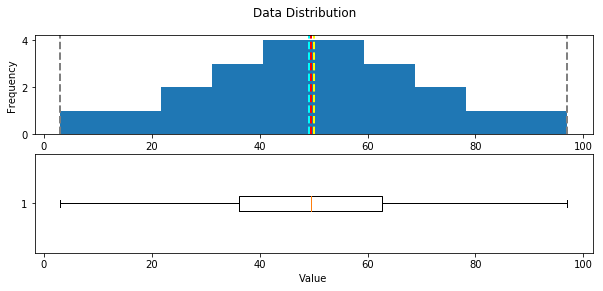

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import os.path

if not os.path.exists('grades.csv'):
    !wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv

#Load data
df_students = pd.read_csv('grades.csv',delimiter=',',header='infer')

#Remove any rows missing data
df_students = df_students.dropna(axis=0, how='any')

# Calculate who passes
passed = pd.Series(df_students.Grade >= 60)

#Saves who passes to dataframe
df_students = pd.concat([df_students, passed.rename("Pass")], axis=1)

print(df_students)

# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()

# Call the function
show_distribution(df_students['Grade'])

Minimum:1.00
Mean:10.52
Median:10.00
Mode:9.00
Maximum:16.00



/home/pedro_fernandes/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


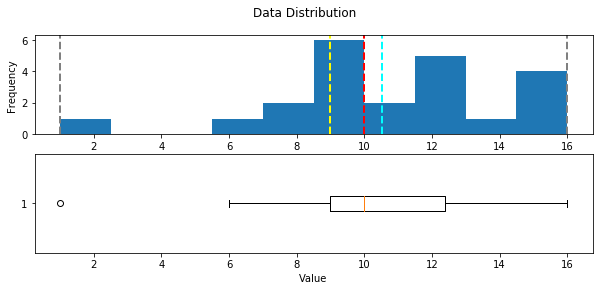

In [3]:
show_distribution(df_students.StudyHours)

0     10.00
1     11.50
2      9.00
3     16.00
4      9.25
6     11.50
7      9.00
8      8.50
9     14.50
10    15.50
11    13.75
12     9.00
13     8.00
14    15.50
15     8.00
16     9.00
17     6.00
18    10.00
19    12.00
20    12.50
21    12.00
Name: StudyHours, dtype: float64
Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



/home/pedro_fernandes/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


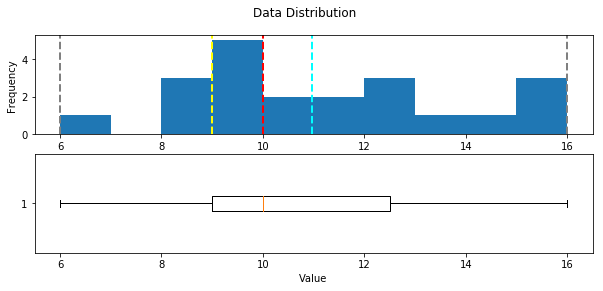

In [5]:
col = df_students[df_students.StudyHours > 1]['StudyHours']
print(col)
show_distribution(col)

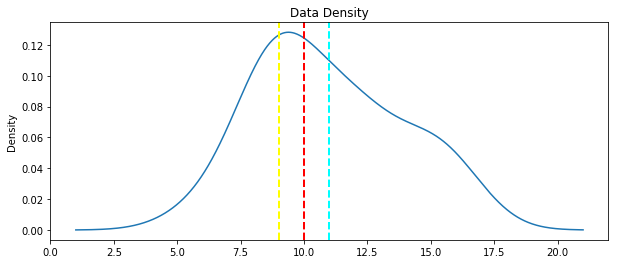

In [9]:
def show_density(data):
    fig = plt.figure(figsize=(10,4))

    data.plot.density()

    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    plt.show()

 ishow_density(col)

In [13]:
import math

mean = df_students.StudyHours.mean()
variance = 0

for hours in df_students.StudyHours: 
    variance = variance + ((mean - hours)**2)

variance = variance / df_students.shape[0]

variance

std = math.sqrt(variance)

std

3.4069690366260925

In [14]:
for col_name in ['Grade', 'StudyHours']:
    col = df_students[col_name]
    rng = col.max() -col.min()
    var = col.var()
    std = col.std()
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))


Grade:
 - Range: 94.00
 - Variance: 472.54
 - Std.Dev: 21.74

StudyHours:
 - Range: 15.00
 - Variance: 12.16
 - Std.Dev: 3.49


In [15]:
print(f'68% of grades will falll between {df_students.Grade.mean() - df_students.Grade.std()} and {df_students.Grade.mean() + df_students.Grade.std()} ')

68% of grades will falll between 27.4439066782538 and 70.91972968538256 


In [16]:
df_students.describe()

,StudyHours,Grade
count,22.000000,22.000000
mean,10.522727,49.181818
std,3.487144,21.737912
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000


In [19]:
df_sample = df_students[df_students.StudyHours>1]
print(df_sample)


         Name  StudyHours  Grade   Pass
0         Dan       10.00   50.0  False
1       Joann       11.50   50.0  False
2       Pedro        9.00   47.0  False
3       Rosie       16.00   97.0   True
4       Ethan        9.25   49.0  False
6    Frederic       11.50   53.0  False
7      Jimmie        9.00   42.0  False
8      Rhonda        8.50   26.0  False
9    Giovanni       14.50   74.0   True
10  Francesca       15.50   82.0   True
11      Rajab       13.75   62.0   True
12    Naiyana        9.00   37.0  False
13       Kian        8.00   15.0  False
14      Jenny       15.50   70.0   True
15     Jakeem        8.00   27.0  False
16     Helena        9.00   36.0  False
17      Ismat        6.00   35.0  False
18      Anila       10.00   48.0  False
19       Skye       12.00   52.0  False
20     Daniel       12.50   63.0   True
21      Aisha       12.00   64.0   True


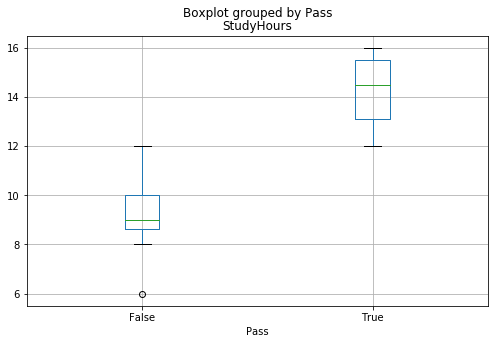

In [20]:
df_sample.boxplot(column='StudyHours', by='Pass', figsize=(8,5))

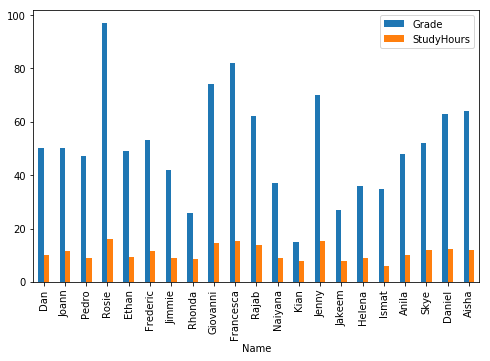

In [21]:
df_sample.plot(x='Name', y=['Grade', "StudyHours"], kind='bar', figsize=(8,5))

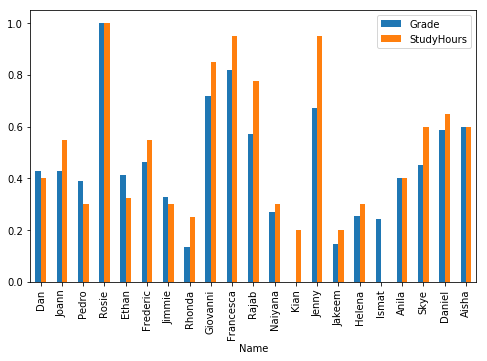

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_normalize =df_sample[['Name', 'Grade', 'StudyHours']].copy()

df_normalize[['Grade', 'StudyHours']] = scaler.fit_transform(df_normalize[['Grade', 'StudyHours']])

df_normalize.plot(x='Name', y=['Grade', "StudyHours"], kind='bar', figsize=(8,5))


In [29]:
df_normalize.Grade.corr(df_normalize.StudyHours)

0.9117666413789677

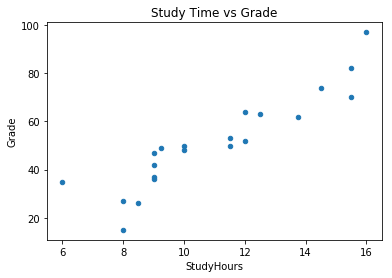

In [31]:
df_sample.plot.scatter(title='Study Time vs Grade', x='StudyHours', y='Grade')

6.31342563379236 -17.91640993281615


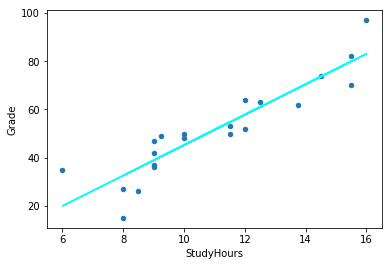

In [36]:
from scipy import stats

df_regression = df_sample[['Grade', 'StudyHours']].copy()

m, b, r, p, se = stats.linregress(df_regression['StudyHours'], df_regression['Grade'])

df_regression['fx'] = (m * df_regression.StudyHours) + b

df_regression['error'] = df_regression.fx - df_regression.Grade

df_regression.plot.scatter(x='StudyHours', y='Grade')

plt.plot(df_regression.StudyHours, df_regression.fx, color='cyan')

print(m,b)


In [40]:
def predict(x):
    m = 6.31342563379236 
    b = -17.91640993281615 
    return m*x + b

prediction = predict(14) #predict(df_regression.StudyHours)

prediction = predict(18)
prediction

95.72525147544634